<a href="https://colab.research.google.com/github/Maximalord/CloudResume/blob/main/Netflix%20Business%20study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Business study **

**Goal**: Analyze Netflix titles to decide **what kind of shows/movies to produce** and **how to grow in different countries**, then present **business insights** and **actionable recommendations**.

**Dataset columns**: `show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description`.

## 1- Problem Statements to tackle

--Which type of content should Netflix prioritize producing?

--How Netflix can grow in different countries as per data pattern?

##2- Environment setup and data load

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_raw= pd.read_csv('netflix.csv')
df = df_raw.copy()
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


###2.1 Basic metrics and data types

In [319]:
df.shape

(8807, 12)

In [320]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [321]:
print("Null values")
df.isna().sum()

Null values


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


##3-Non- graphical analysis (count & unique)

In [322]:
def top_value_counts(series, n=20):
    return series.value_counts(dropna=True).head(n).to_frame()

In [323]:
top_type = top_value_counts(df['type'])
top_release_year = top_value_counts(df['release_year'])
top_rating = top_value_counts(df['rating'])
top_duration = top_value_counts(df['duration'])

print("Top 'type':")
print(top_type.to_string())

print("\nTop 'release_year':")
print(top_release_year.to_string())

print("\nTop 'rating':")
print(top_rating.to_string())

print("\nTop 'duration':")
print(top_duration.to_string())

# Now you have all variables for charting later:
# top_type, top_release_year, top_rating, top_duration

Top 'type':
         count
type          
Movie     6131
TV Show   2676

Top 'release_year':
              count
release_year       
2018           1147
2017           1032
2019           1030
2020            953
2016            902
2021            592
2015            560
2014            352
2013            288
2012            237
2010            194
2011            185
2009            152
2008            136
2006             96
2007             88
2005             80
2004             64
2003             61
2002             51

Top 'rating':
          count
rating         
TV-MA      3207
TV-14      2160
TV-PG       863
R           799
PG-13       490
TV-Y7       334
TV-Y        307
PG          287
TV-G        220
NR           80
G            41
TV-Y7-FV      6
NC-17         3
UR            3
74 min        1
84 min        1
66 min        1

Top 'duration':
           count
duration        
1 Season    1793
2 Seasons    425
3 Seasons    199
90 min       152
97 min       146
94 min      

In [324]:
summaries = {}
for i in df.columns:
  summaries[i] = {"unique":(df[i].nunique(dropna=True))}

pd.DataFrame(summaries).T.sort_values("unique", ascending=False)

,unique
show_id,8807
title,8807
description,8775
cast,7692
director,4528
date_added,1767
country,748
listed_in,514
duration,220
release_year,74


##4- Visual Analysis - Univariate, Bivariate after pre-processing of the data
###4.1- Pre-processing and categorical parsing

In [325]:
df['date_added'] = pd.to_datetime(df['date_added'], format= 'mixed')
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month_name()
df['day'] = df['date_added'].dt.day
df['day_of_week'] = df['date_added'].dt.day_name()

cat_coln = ['type','rating']
for c in cat_coln:
  if c in df.columns:
    df[c] = df[c].astype("category")

df['genre'] = df['listed_in'].str.split(",")
all_genres = df['genre'].explode().str.strip()

def multi_list(series):
    return (series.dropna().astype(str).str.split(",").explode().str.strip().value_counts().to_frame())

top_countries = multi_list(df['country']).head(20)
top_genres = pd.Series(all_genres).value_counts().head(10)
top_directors = df['director'].dropna().value_counts().head(10)
top_actors = multi_list(df['cast']).head(10)

print("Top Countries:")
print(top_countries.to_string())

print("\nTop Genres:")
print(top_genres.to_string())

print("\nTop Directors:")
print(top_directors.to_string())

print("\nTop Actors:")
print(top_actors.to_string())

# Now you have all variables for charting later:
# top_countries, top_genres, top_directors, top_actors

Top Countries:
                count
country              
United States    3690
India            1046
United Kingdom    806
Canada            445
France            393
Japan             318
Spain             232
South Korea       231
Germany           226
Mexico            169
China             162
Australia         160
Egypt             117
Turkey            113
Hong Kong         105
Nigeria           103
Italy             100
Brazil             97
Argentina          91
Belgium            90

Top Genres:
genre
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616

Top Directors:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas  

###4.2-  For continuous variable(s)

####4.2.1 Continuous


Minimum Year: 1925
Maximum Year: 2021
Count of titles per decade:
decade
1925-1935       1
1935-1945       8
1945-1955       9
1955-1965      21
1965-1975      42
1975-1985     105
1985-1995     177
1995-2005     420
2005-2015    1808
2015-2025    6216
Name: show_id, dtype: int64


/tmp/ipython-input-46793574.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decade_counts = df.groupby('decade')['show_id'].count()


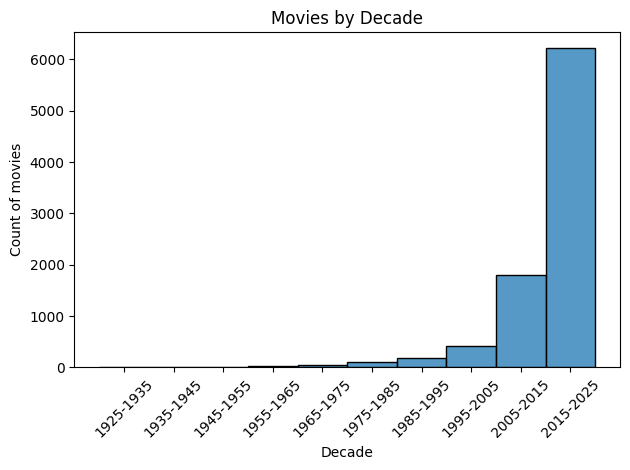

In [326]:
#Movies by Decade
min_year = min(df['release_year'])
max_year = max(df['release_year'])

print("Minimum Year:", min_year)
print("Maximum Year:", max_year)
bin = [1925,1935,1945,1955,1965,1975,1985,1995,2005,2015,2025]
labels=['1925-1935','1935-1945','1945-1955','1955-1965','1965-1975','1975-1985','1985-1995','1995-2005','2005-2015','2015-2025']
df['decade'] = pd.cut(df['release_year'], bins = bin, labels = labels, right= False)

# Calculate count of titles per decade
decade_counts = df.groupby('decade')['show_id'].count()
print("Count of titles per decade:")
print(decade_counts)

# Generate countplot
sns.histplot(data= df, x = 'decade')
plt.xticks(rotation=45)
plt.xlabel('Decade')
plt.ylabel('Count of movies')
plt.title('Movies by Decade')
plt.tight_layout()
plt.show()

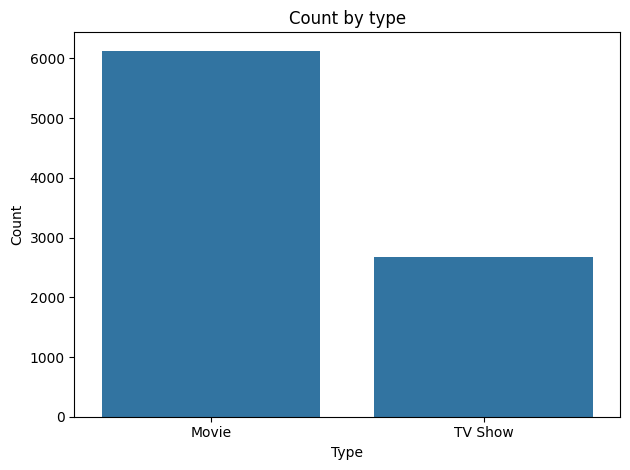

In [327]:
#Count by type
sns.countplot(data=df, x='type')
plt.title('Count by type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

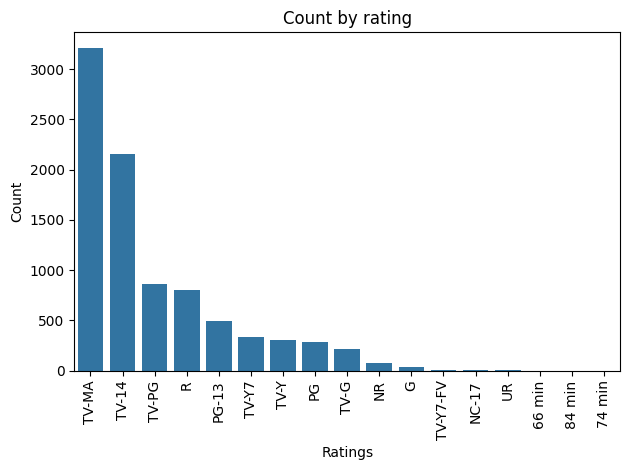

In [328]:
#Count by rating
sns.countplot(data=df, x='rating', order =df['rating'].value_counts().index )
plt.title('Count by rating')
plt.xticks(rotation=90)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

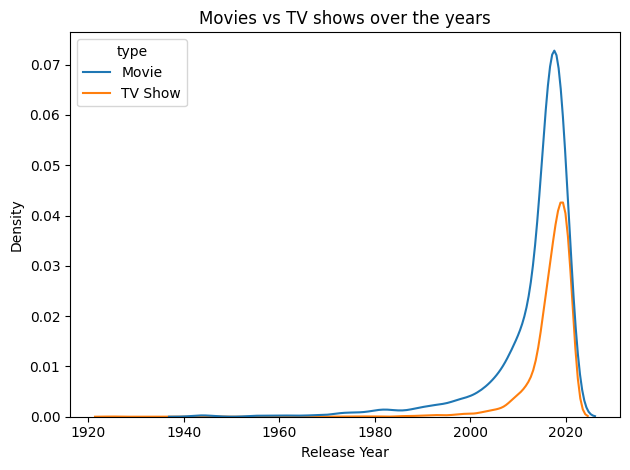

In [329]:
#Movies vs TV shows over the years

sns.kdeplot(data=df, x='release_year', hue ='type', fill = False)
plt.title('Movies vs TV shows over the years')
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

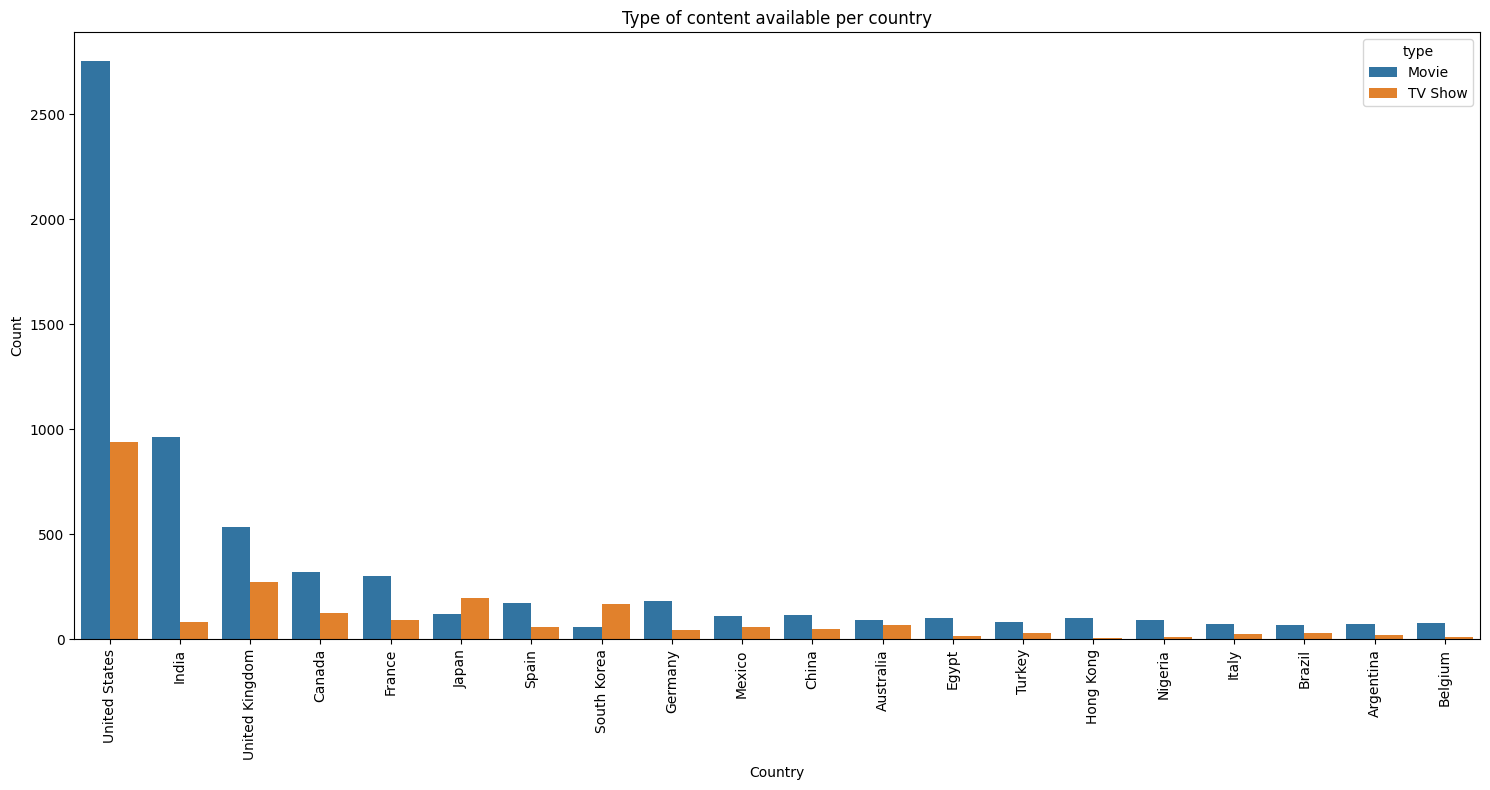

In [330]:
# Create exploded series first
exploded_countries = (df['country'].dropna()
                     .astype(str)
                     .str.split(',')
                     .explode()
                     .str.strip())

# Create new DataFrame with matching indices
df_fil = df.loc[exploded_countries.index].copy()
df_fil['country'] = exploded_countries.values

# Filter for top countries
df_fil = df_fil[df_fil['country'].isin(top_countries.index)]

# Create the plot
plt.figure(figsize=(15, 8))
sns.countplot(data=df_fil, x='country', hue='type', order=top_countries.index)
plt.title('Type of content available per country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

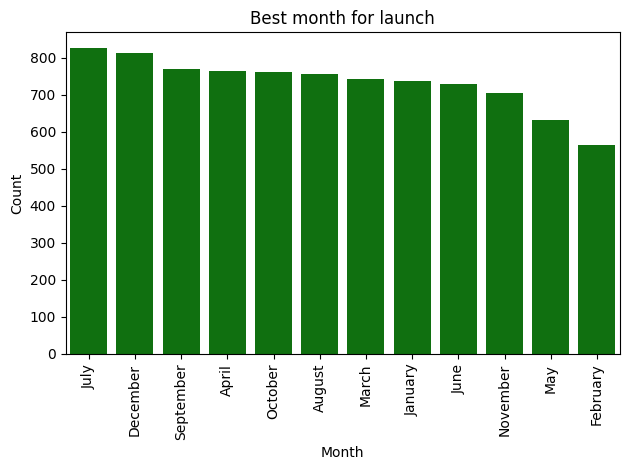

In [331]:
#Best month for launch
sns.countplot(data=df, x='month', order =df['month'].value_counts().index , color='green' )
plt.title('Best month for launch')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

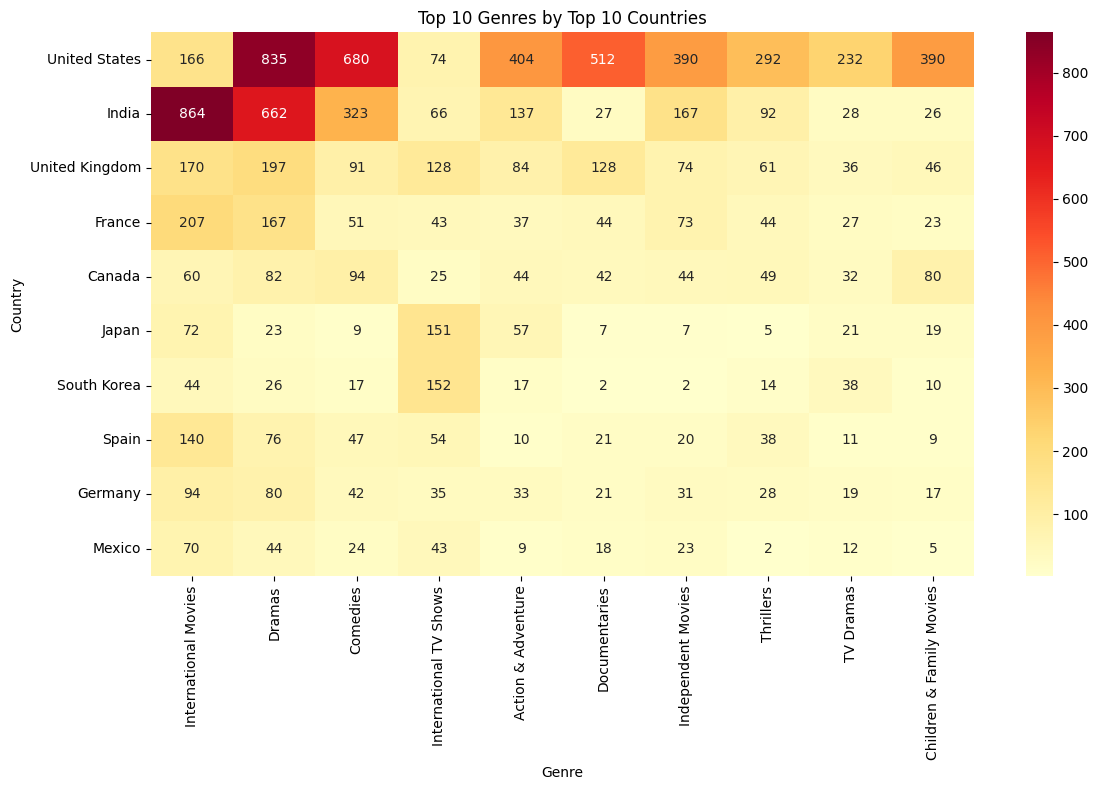

In [332]:
# --- Clean & explode genres ---
genres = (df[['show_id', 'listed_in']]
          .dropna()
          .assign(listed_in_=lambda x: x['listed_in'].str.split(","))
          .explode('listed_in_'))
genres['listed_in_'] = genres['listed_in_'].str.strip()

# --- Clean & explode countries ---
countries = (df[['show_id', 'country']]
          .dropna()
          .assign(country_=lambda x: x['country'].str.split(","))
          .explode('country_')
)
countries['country_'] = countries['country_'].str.strip()

# --- Merge genres & countries ---
merged = pd.merge(genres[['show_id', 'listed_in_']],
    countries[['show_id', 'country_']],on="show_id")

# --- Cross-tab (genre vs country) ---
cross_tab = pd.crosstab(merged['country_'], merged['listed_in_'])

# Focus on top 10 countries & genres
top_countries = merged['country_'].value_counts().head(10).index
top_genres = merged['listed_in_'].value_counts().head(10).index
filtered = cross_tab.loc[top_countries, top_genres]

# --- Plot heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(filtered, annot=True, fmt='d', cmap='YlOrRd')
plt.title("Top 10 Genres by Top 10 Countries")
plt.xlabel("Genre")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


<Figure size 2200x1000 with 0 Axes>

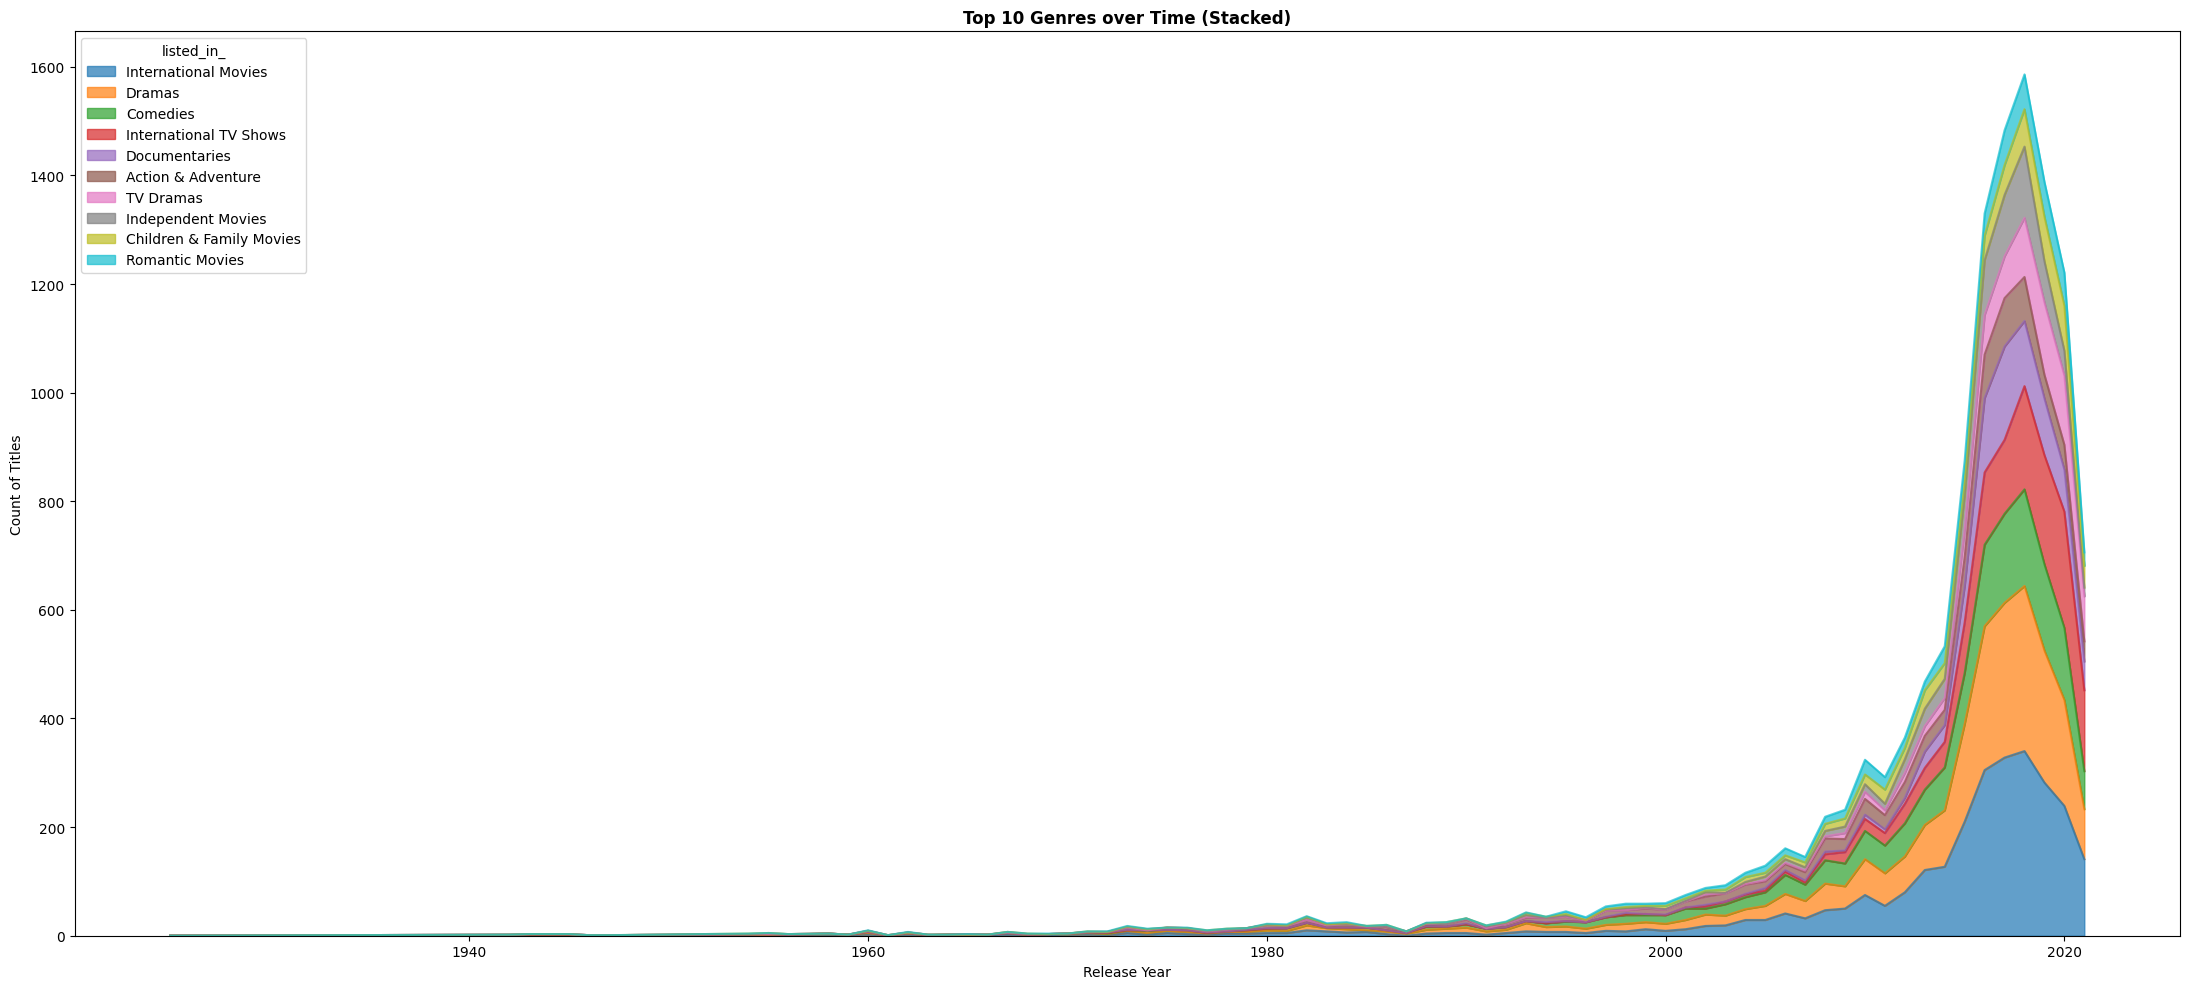

In [333]:
# Merge exploded genres back with df to include release_year
merged = pd.merge(genres[['show_id', 'listed_in_']],
    df[['show_id', 'release_year']],
    on="show_id", how="left")

# Now you can group by release_year and genre
genre_year = (merged.groupby(['release_year', 'listed_in_']).size()
    .unstack(fill_value=0) )

# Focus only on top 10 genres
top_genres = merged['listed_in_'].value_counts().head(10).index
genre_year = genre_year[top_genres]

# Plot stacked area chart
plt.figure(figsize=(22, 10))
genre_year.plot(kind='area', stacked=True, alpha=0.7, figsize=(22, 10))
plt.title("Top 10 Genres over Time (Stacked)", fontweight='bold')
plt.xlabel("Release Year")
plt.ylabel("Count of Titles")
plt.tight_layout()
plt.show()


##5. Missing Value & Outlier check (Treatment optional) (10 Points)



In [334]:
# 1. Fill missing categorical columns
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['date_added'] = df['date_added'].fillna("Unknown")
df['rating'] = df['rating'].astype(str).fillna("Unknown").astype('category')


# 2. # Recheck missing values
print(df.isnull().sum())

# 3. Shape after cleaning
print("Final dataset shape:", df.shape)



show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         3
listed_in        0
description      0
year            10
month           10
day             10
day_of_week     10
genre            0
decade           0
dtype: int64
Final dataset shape: (8807, 18)


#6. Insights based on Non-Graphical and Visual Analysis


##6.1 Comments on the range of attributes
--Numeric Attributes: release_year spans early cinema to recent times(1925 - 2021), with a few outliers (very old years or long durations). Most titles are recent.

--Categorical Attributes: Fields like type, rating, genre, and country show high diversity. Movies dominate over TV Shows, and ratings like TV-MA are most frequent. Some fields (e.g., director, cast) have missing values.


##6.2 Comments on the distribution of the variables and relationship between them
--Most titles are post-2000, with Movies dominating over TV Shows.

--Ratings cluster around TV-MA and TV-14.

--US and India produce the bulk of content across genres.

--Strong links exist between country, genre, and rating (e.g., US → Documentaries, India → Drama/Music).


##6.3 Comments for each univariate and bivariate plot

Univariate Plots

==Type (Movie/TV): Movies dominate, but TV shows have been growing steadily.

==Ratings: Majority fall under TV-MA and TV-14, targeting adult/teen audiences.

==Release Year: Titles skew towards recent years, showing Netflix’s rapid growth post-2010.

==Country: The US leads content production, followed by India, UK, and others.

==Genres: Drama, Comedy, and Documentaries are the most frequent categories.

Bivariate Plots

==Year vs. Type: Both Movies and TV Shows increase over time, with Movies more consistent.

==Country vs. Genre (Heatmap): Strong genre-country associations (e.g., India → International movies,Dramas, US → Dramas/Comedies).

Rating vs. Type: TV shows and movies are mostly TV-MA/TV-14

Year vs. Genre (Stacked Area): Recent years show rising variety in genres, with strong growth in Drama and Comedy.



 ## 7.Business Insights

- As  **TV Shows** share is rising year-on-year → Netflix should **prioritize serial content**, especially in growth markets.
- Specific **genres** like  (e.g., India → International movies,Dramas, US → Dramas/Comedies) dominate in top countries → Double down on those combinations.
- Certain **months** (July and December) see slightly more title additions → Time launches/marketing accordingly.

#8. Recommendations

- **Content slate**: Produce more `[International movies, Drama]` in `[India]` and [Dramas, Comedies]` in `[US]`
- **Talent strategy**: Partner with top `[eg . Directors -- Rajiv Chilaka, Raúl Campos, Jan Suter,
Suhas Kadav and Actors -- Anupam Kher, Shah Rukh Khan, Julie Tejwani]`  
- **Market entries**: Localize and co-produce in `[United States, India, United Kingdom ]` where catalog depth is thin but demand appears high.  
- **Release timing**: Launch shows in `[July and December]` where additions spike, aligning with regional holidays.  
- **Catalog hygiene**: Retire/refresh underperforming long-tail content; promote rising-genres in carousels.

Thank you.